<a href="https://colab.research.google.com/github/Bolorooo24/CV-ML_labs/blob/main/Pytorch-deep-learning/03_pytorch_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch computer vision
* See the reference notebook : https://github.com/mrdbourke/pytorch-deep-learning/blob/main/video_notebooks/03_pytorch_computer_vision_video.ipynb
* See reference online book : https://www.learnpytorch.io/03_pytorch_computer_vision/

### 0. Computer vision libraries in Pytorch
* 'torchvision' - base domain library for computer vision - https://docs.pytorch.org/vision/main/index.html
* 'torchvision.datasets' - get datasets and data loading functions for computer vision
* 'torchvision.models' - get pretrained computer vision models that you can apply for your problems
* 'torchvision.transforms' - functions for mainpulating your vision data images
* 'torch.utils.data.Dataset' - Base dataset class for pytorch
* 'torch.utils.data.DataLoader' - Creates a python iterable over a dataset

In [1]:
#import pytorch
import torch
from torch import nn

# import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# visualize
import matplotlib.pyplot as plt

# check versions
print(torch.__version__)
print(torchvision.__version__)

2.8.0+cu126
0.23.0+cu126


## 1. Getting a computer vision dataset

FashionMNIST dataset will be used from torchvision.datasets - https://docs.pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html#torchvision.datasets.FashionMNIST


In [2]:
# setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # do we want the training dataset?
    download=True, # do we want to download yes/no?
    transform=torchvision.transforms.ToTensor(),
    target_transform=None # how do we want to transform the labels/targets?

)
# setup test data
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [3]:
len(train_data), len(test_data)

(60000, 10000)

In [4]:
# see the first trianing example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
image.shape

torch.Size([1, 28, 28])

In [6]:
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [7]:
class_names= train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [8]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [9]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [10]:
# check the shape
print(f"image shape: {image.shape} -> [color_channels, height, width]")
print(f"image label: {class_names[label]}")

image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
image label: Ankle boot


### 1.2. Visualizing Random samples of data

In [11]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

Image shape: torch.Size([1, 28, 28])


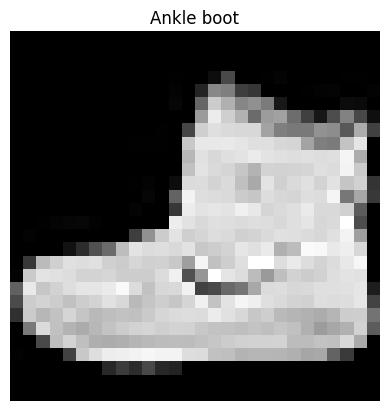

In [12]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")

plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);
plt.axis(False);

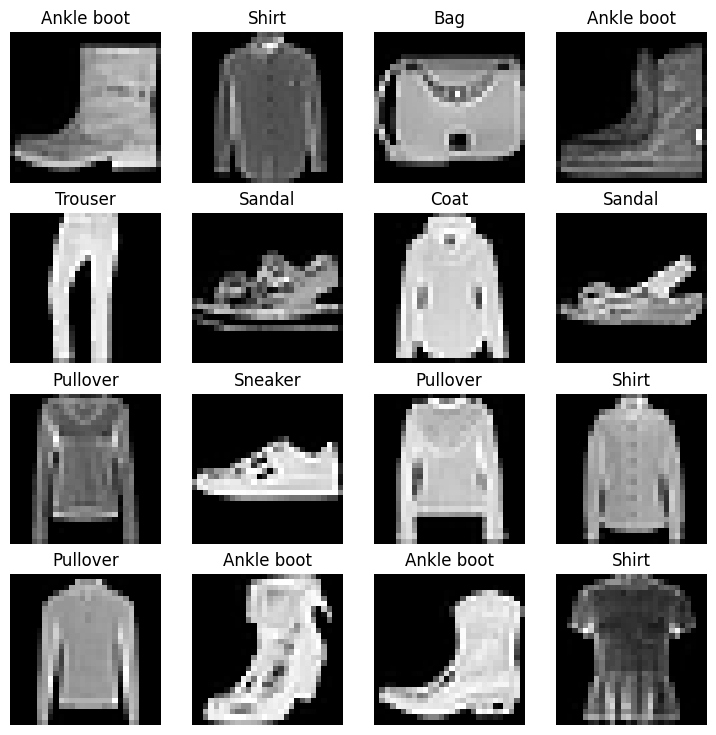

In [13]:
# plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False);


In [14]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 2. Prepare DataLoader

Right now, out data is in the form of pytorch dataset.
DataLoader turns our dataset into a python iterable
Specifically, we want to turn our data into batches or mini-batches.

1. It is more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 images at a time (batch size of 32)
2. It gives our neural network more chances to update its gradients per epoch

Andrew ng batch mini size lecure - https://www.youtube.com/watch?v=ed4whd9B-xw

In [15]:
from torch.utils.data import DataLoader # https://docs.pytorch.org/docs/stable/data.html

# setup the batch size hyperparameter
BATCH_SIZE = 32

# turn dataset into iterables (batches)
train_dataloader = DataLoader(dataset=train_data, # dataset to turn into iterable
                              batch_size=BATCH_SIZE, # how many samples per batch?
                              shuffle=True) # shuffle data every epoch?
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7bff17619be0>,
 <torch.utils.data.dataloader.DataLoader at 0x7bff17943530>)

In [16]:
# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Lenght of the train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Lenght of the train dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7bff17619be0>, <torch.utils.data.dataloader.DataLoader object at 0x7bff17943530>)
Lenght of the train dataloader: 1875 batches of 32...
Lenght of the train dataloader: 313 batches of 32...


In [17]:
# check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: torch.Size([])


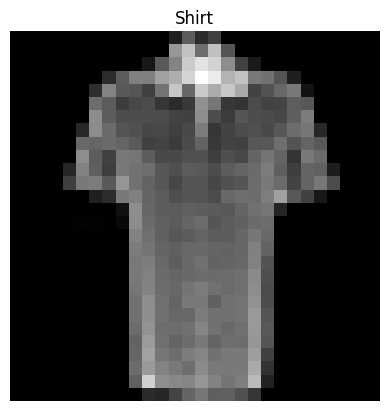

In [18]:
# show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label.shape}")

## 3. Model 0: Creating a baseline model

When starting to build a series of machine learning modelling experiments, it's best practice to build baseline model

A baseline model is a simple model you will try improve upon with subsequent models/experiments

In other words: start simply add complexity when necessary

In [19]:
# create a flatten layer
flatten_model = nn.Flatten()

# get a single sample
x = train_features_batch[0]

# flatten the sample
output= flatten_model(x) # perform forward pass

print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height* width]")


Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height* width]


In [20]:
output.squeeze().shape

torch.Size([784])

In [21]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), # neural networkds like their inputs in vector form
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )
  def forward(self, x):
    return self.layer_stack(x)




In [22]:
torch.manual_seed(42)

# setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=784, # this is 28*28
    hidden_units=10, # how many unit sin the hidden layer
    output_shape=len(class_names) # one for every class
).to("cpu")
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [23]:
len(class_names)

10

In [24]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x).shape

torch.Size([1, 10])

In [25]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 Setup a loss and optimizer and evaluation metrics
* Loss function - since we're working with multi-class data, our loss function will eb 'nn.CrossEntropyLoss()'
* Optimizer - our optimizer 'torch_optim.SDG' (stochastic gradient descent)
* Evaluation metric - since we're working on a classification problem, let's use accuracy as our evaluation metric


In [26]:
import requests
from pathlib import Path

# download helper functions from learn pytorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [27]:
# import accuracy metric
from helper_functions import accuracy_fn

# setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)


### 3.2 Creating a function to time our experiments

Machine learning is very experimental.

Two of the main things you'll often want to track are:
1. Model's performance (loss and accuracy values etc)
2. How fast it runs



In [28]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device=None):
  """Prints difference between start and end time
  """
  total_time = end-start
  print(f"Train time on {device}: {total_time:.3f} seconds")

  return total_time


In [29]:
start_time = timer()

end_time = timer()
print_train_time(start=start_time,
                 end=end_time,
                 device="cpu")

Train time on cpu: 0.000 seconds


4.337199993642571e-05

### 3.3 Creating a training loop and training a model on batches of data

1. Loop through epochs,
2. Loop through training batches, perform training steps, calculate the train loss *per batch*
3. Loop through testing batches, perform testing steps, calculate the test loss per batch
4. Print out what's happening
5. Time it all for fun


In [30]:
# import tqdm from progress bar
from tqdm.auto import tqdm

# set the seed and start the timer

torch.manual_seed(42)
train_time_start_on_cpu = timer()

# set the number of epochs
epochs =3

# create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----")

  ###training
  train_loss=0
  # add a loop to loop through the training batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    # 1. Forward pass
    y_pred=model_0(X)

    # 2. Calculate loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulate train loss

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # print out
    if batch % 400 == 0:
      print(f"lOoked at {batch*len(X)}/{len(train_dataloader.dataset)} samples.")
  # divide total train loss by length of train dataloader
  train_loss/=len(train_dataloader)

  ### testing
  test_loss, test_acc = 0,0
  model_0.eval()

  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # 1. Forward pass
      test_pred = model_0(X_test)

      # 2. Calculate loss (accumulativeluy)
      test_loss += loss_fn(test_pred, y_test).item()

      # 3. Calculate accuracy
      test_acc += accuracy_fn(y_true=y_test,
                              y_pred=test_pred.argmax(dim=1))

    # calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    # calculate the test acc average per batch
    test_acc /= len(test_dataloader)

  print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")
# calcualte training time
train_time_end_on_cpu=timer()
total_train_time_model_0 = print_train_time(
    start=train_time_start_on_cpu,
    end=train_time_end_on_cpu,
    device=str(next(model_0.parameters()).device))



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
lOoked at 0/60000 samples.
lOoked at 12800/60000 samples.
lOoked at 25600/60000 samples.
lOoked at 38400/60000 samples.
lOoked at 51200/60000 samples.

Train loss: 0.5904 | Test loss: 0.5095, Test acc: 82.0387
Epoch: 1
-----
lOoked at 0/60000 samples.
lOoked at 12800/60000 samples.
lOoked at 25600/60000 samples.
lOoked at 38400/60000 samples.
lOoked at 51200/60000 samples.

Train loss: 0.4763 | Test loss: 0.4799, Test acc: 83.1969
Epoch: 2
-----
lOoked at 0/60000 samples.
lOoked at 12800/60000 samples.
lOoked at 25600/60000 samples.
lOoked at 38400/60000 samples.
lOoked at 51200/60000 samples.

Train loss: 0.4550 | Test loss: 0.4766, Test acc: 83.4265
Train time on cpu: 27.088 seconds


## 4. Make predictions and get model0 results


In [31]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """Returns a dictionary containing the results of model predicting on data_loader"""
  loss, acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # make predictions
      y_pred = model(X)

      # accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred = y_pred.argmax(dim=1))
    # scalre loss and acc to find the avg loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)
  return {"model_name": model.__class__.__name__, # only works when model was created with class
          "model_loss": loss.item(),
          "model_acc": acc
          }

# calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn=accuracy_fn)

model_0_results


  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

In [32]:
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn=accuracy_fn
                             )

model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

In [33]:
!nvidia-smi

Tue Nov 11 01:45:08 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   62C    P8             13W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## 5. Setup device agnostic-code (for using a GPU if there is one)

In [34]:

import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 6. Model 1: Create non-linear model

We learned the non linear model in model 2.

In [35]:
from torch.nn.modules.linear import Linear
import torch.nn as nn
# create a model

class FashionMNISTModelV1(nn.Module):
  def __init__(self, input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_shape),
        nn.ReLU()

    )
  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)





In [36]:
# create an isntance of model_1
torch.manual_seed(42)

model_1 = FashionMNISTModelV1(
    input_shape=784, # this 28*28
    hidden_units=10,
    output_shape=len(class_names)
).to(device)

next(model_1.parameters()).device

device(type='cuda', index=0)

### 6.1 Setup loss, optimizer and evaluation metrics


In [37]:
from helper_functions import accuracy_fn
# create loss function and optimizer

loss_fn = nn.CrossEntropyLoss() # measure how wrong our mdoel is
optimizer = torch.optim.SGD(params=model_1.parameters(), # tries to update our mdoel;s parameters to reduce the loss
                            lr = 0.1)


### 6.2 Functionizing training and evaluation loop

Let's create a function for:
 * training loop : train_step()
 * test loop : test_step()

In [38]:
def train_step(data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               model: torch.nn.Module,
               accuracy_fn,
               device: torch.device=device
               ):

  """Performs a training with model trying to learn on data_loader"""

  train_loss, train_acc = 0,0

  # put model into trianing mode
  model.train()

  for batch, (X, y) in enumerate(train_dataloader):
    # put data on target device
    X, y = X.to(device), y.to(device)
    # 1. Forward pass
    y_pred = model(X)

    # 2. Calculate loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss # accumulatively add up the loss per epoch
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1)) # go from logits to prediction label
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Print out how many samples have been seen
    if batch % 400 == 0:
        print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

  # Divide total train loss by length of train dataloader (average loss per batch per epoch)
  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.4f} | Train acc: {train_acc:.2f}%")





In [39]:
def test_step(model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              accuracy_fn,
              device: torch.device=device):
  """Performs a testing loop step on model going over data_loader."""
  test_loss, test_acc = 0, 0
  # put the model in eval mode
  model.eval()

  # turn on inference mode context manager
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # send the data to the target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred = model(X)

      # 2. Calculate loss (accumulatively)
      test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

      # 3. Calculate accuracy (preds need to be same as y_true)
      test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1))

    # Calculations on test metrics need to happen inside torch.inference_mode()
    # Divide total test loss by length of test dataloader (per batch)
    test_loss /= len(data_loader)

    # Divide total accuracy by length of test dataloader (per batch)
    test_acc /= len(data_loader)

    ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")



In [40]:
from timeit import default_timer as timer
# set the random seed
torch.manual_seed(42)
train_time_start_on_gpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n--------")
  train_step(data_loader=train_dataloader,
             loss_fn = loss_fn,
             optimizer=optimizer,
             model=model_1,
             accuracy_fn=accuracy_fn,
             device=device
             )
  test_step(model=model_1,
            loss_fn=loss_fn,
            data_loader=test_dataloader,
            accuracy_fn=accuracy_fn,
            device=device)

  train_time_end_on_gpu = timer()
  total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                              end=train_time_end_on_gpu,
                                              device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
--------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 1.0920 | Train acc: 61.34%


  0%|          | 0/313 [00:00<?, ?it/s]


Train loss: 0.45503 | Test loss: 0.95636, Test acc: 65.00%

Train time on cuda: 9.670 seconds
Epoch: 1
--------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.7378 | Train acc: 73.69%


  0%|          | 0/313 [00:00<?, ?it/s]


Train loss: 0.45503 | Test loss: 0.72300, Test acc: 74.24%

Train time on cuda: 19.352 seconds
Epoch: 2
--------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.6678 | Train acc: 76.08%


  0%|          | 0/313 [00:00<?, ?it/s]


Train loss: 0.45503 | Test loss: 0.68743, Test acc: 75.66%

Train time on cuda: 30.144 seconds


In [41]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

> **Note** Sometimes, depending on your data/hardware you might find that your model trains faster on cpu and gpu.
>
> Why is this?
> 1. It could be that the overhead for copying data/model to and from the pug outweghts the compute benefits offered by the gpu
> 2. The hardware you're using has a better cpu in terms compute capability than the gpu

Read more here: https://horace.io/brrr_intro.html

In [42]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=device):
  """Returns a dictionary containing the results of model predicting on data_loader"""
  loss, acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # make our data device agnostic
      X, y = X.to(device), y.to(device)
      # make predictions
      y_pred = model(X)

      # accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred = y_pred.argmax(dim=1))
    # scalre loss and acc to find the avg loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)
  return {"model_name": model.__class__.__name__, # only works when model was created with class
          "model_loss": loss.item(),
          "model_acc": acc
          }




In [43]:
# get mode_1 results dictionary
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             accuracy_fn=accuracy_fn,
                             loss_fn=loss_fn,
                             device=device)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.68743497133255,
 'model_acc': 75.65894568690096}

In [44]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

## Model 2: Building a convolutional neural network

CNN's are also know as ConvNets.

CNN's are known for their capabilities to find patterns in visual data

cnn explainer: https://poloclub.github.io/cnn-explainer/

In [45]:
from torch.nn.modules.pooling import MaxPool2d
from torch.nn.modules.conv import Conv2d
from torch.nn.modules import padding
# create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture that replicates the TinyVGG
  model from CNN explainer website
  """
  def __init__(self,input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    # create
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1), # values we can set ourselves in our NN's are called hyperparameters
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
        )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )
  def forward(self, x):
    x = self.conv_block_1(x)
    # print(f"Output shape of conv_block_1 : {x.shape}")
    x = self.conv_block_2(x)
    #  print(f"Output shape of conv_block_2 : {x.shape}")
    x = self.classifier(x)
    # print(f"Output shape of classifier : {x.shape}")
    return x


In [46]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

### 7.2 Stepping thtough 'nn.Conv2d()'
See the documentation here - https://docs.pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

In [47]:
torch.manual_seed(42)

# create a batch of images
images = torch.randn(size=(32,3,64,64))
test_image = images[0]

print(f"Image batch shape: {image.shape}")
print(f"Singe image shape: {test_image.shape}")


Image batch shape: torch.Size([1, 28, 28])
Singe image shape: torch.Size([3, 64, 64])


In [48]:
torch.manual_seed(42)
# create a single conv2d layer
conv_layer=nn.Conv2d(in_channels=3,
                     out_channels=10,
                     kernel_size=3,
                     stride=1,
                     padding=1)

# pass the data through the convolutional layer
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 64, 64])

### 7.2 Stepping through nn.MaxPool2d()

Documentation https://docs.pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html

In [49]:
# print out original iamge shape without unsqueezed simension
print(f"Test image original shape: {test_image.shape}")
print(f"Test imagw with unsqueezed dimension: {test_image.unsqueeze(0).shape}")

# create a sample nn.MaxPool2d
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

# pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv and maxpool(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test imagw with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 64, 64])
Shape after going through conv and maxpool(): torch.Size([1, 10, 32, 32])


In [50]:
torch.manual_seed(42)

# create a random tensor with a silimar number of dimensions to our images
random_tensor = torch.randn(size=(1,1,2,2))
print(f"\nRandom tensor: \n {random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")
# create a maxpooling layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor: \n {max_pool_tensor}")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")



Random tensor: 
 tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor: 
 tensor([[[[0.3367]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


In [51]:
rand_image_tensor = torch.randn(size=(1,28,28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [52]:
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0424, -0.0839,  0.0839, -0.0463,  0.0053,  0.0437,  0.0025,  0.0108,
         -0.0158, -0.0177]], device='cuda:0', grad_fn=<AddmmBackward0>)

### 7.3 Setup a loss function and optimizer for model 3


In [53]:
# create the loss funciton
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

### 7.4 Training and testing model_2 using our training and test fucntions


In [54]:
torch.manual_seed(42)

# measure time
from timeit import default_timer as timer
train_time_start_model_2_gpu = timer()

# train and test model
epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")
  train_step(data_loader=train_dataloader,
             model = model_2,
             loss_fn= loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_2,
            loss_fn=loss_fn,
            data_loader=test_dataloader,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_model_2_gpu = timer()
total_train_time_model_2_gpu  = print_train_time(end = train_time_end_model_2_gpu,
                                                 start = train_time_start_model_2_gpu,
                                                 device=device)



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.5952 | Train acc: 78.33%


  0%|          | 0/313 [00:00<?, ?it/s]


Train loss: 0.45503 | Test loss: 0.39234, Test acc: 85.87%

Epoch: 1
------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.3649 | Train acc: 86.80%


  0%|          | 0/313 [00:00<?, ?it/s]


Train loss: 0.45503 | Test loss: 0.37415, Test acc: 86.63%

Epoch: 2
------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.3317 | Train acc: 88.09%


  0%|          | 0/313 [00:00<?, ?it/s]


Train loss: 0.45503 | Test loss: 0.33842, Test acc: 87.91%

Train time on cuda: 36.674 seconds


In [55]:
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.33841609954833984,
 'model_acc': 87.90934504792332}


## 8. Compare model results and training time.


In [56]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.687435,75.658946
2,FashionMNISTModelV2,0.338416,87.909345


In [57]:
# add training time to results comparison
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2_gpu]

compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,27.087824
1,FashionMNISTModelV1,0.687435,75.658946,30.143577
2,FashionMNISTModelV2,0.338416,87.909345,36.673789


Text(0, 0.5, 'model')

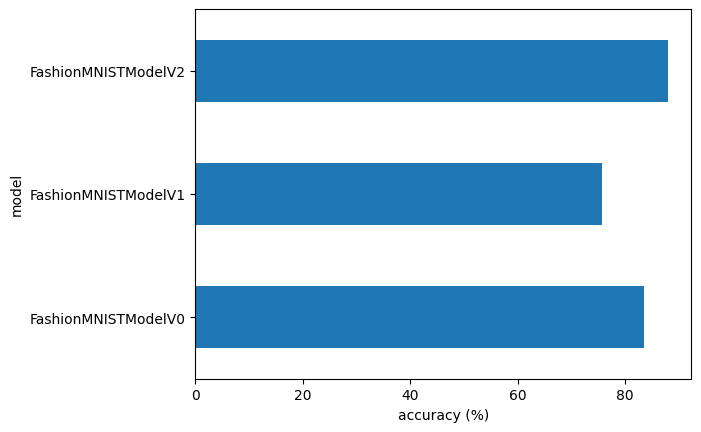

In [58]:
# visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

## 9. Make and evaluate random predictions with best model



In [59]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # prepare the sample (add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # forward pass (mdoel output raw logits)
      pred_logit = model(sample)

      # get prediction prob logits->prediction prob
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # get pred_prob off the gpu for further calculations
      pred_probs.append(pred_prob.cpu())
  # stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)


In [60]:
import random
# random.seed(42)
test_samples=[]
test_labels=[]
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# view the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Trouser')

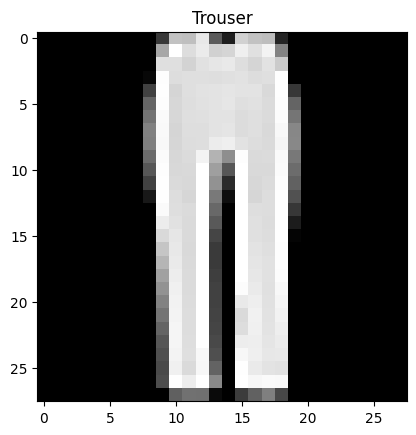

In [61]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [62]:
# make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

# view first two prediction probabilities
pred_probs[:2]

tensor([[1.4248e-05, 9.9981e-01, 4.4687e-07, 1.1612e-04, 5.3836e-05, 2.5806e-07,
         2.1225e-06, 1.7273e-07, 4.7409e-07, 5.3764e-08],
        [2.3252e-04, 9.5123e-06, 1.4910e-03, 1.8274e-04, 2.4089e-03, 3.1063e-07,
         9.9564e-01, 1.8455e-07, 3.4593e-05, 2.7897e-06]])

In [63]:
# convert to prediction prob to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([1, 6, 2, 9, 9, 3, 1, 0, 8])

In [64]:
test_labels

[1, 6, 2, 9, 9, 3, 1, 3, 8]

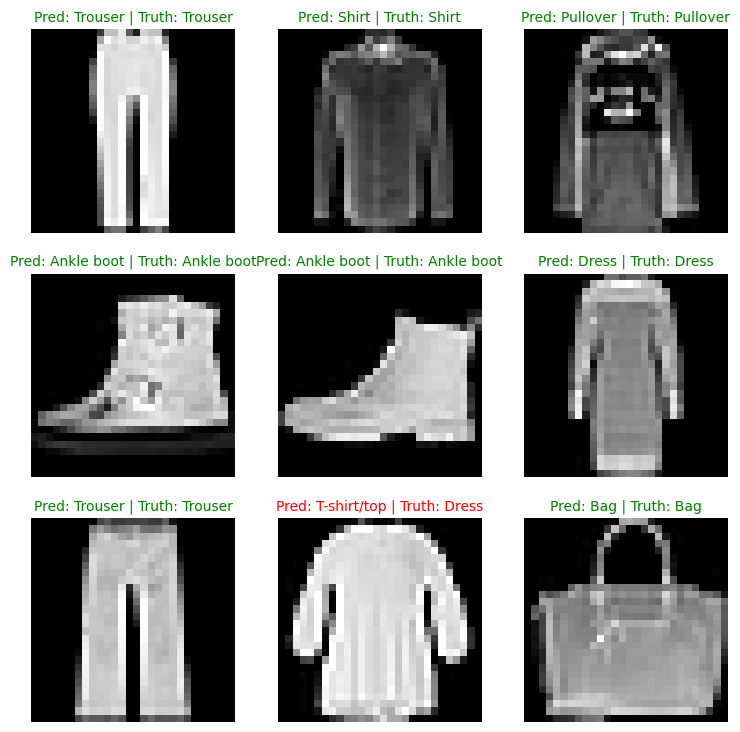

In [65]:
# plot predictions
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # create subplot
  plt.subplot(nrows,ncols,i+1)

  # plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # find the prediction (in text form, e.g sandal)
  pred_label = class_names[pred_classes[i]]

  # get the truth label (in text form)
  truth_label = class_names[test_labels[i]]

  # create a title for the plot
  titel_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # check for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(titel_text, fontsize=10, c="g") # green text if prediction same as truth

  else:
    plt.title(titel_text, fontsize=10, c="r")
  plt.axis(False);

## 10. Making a confusion matrix for further prediction evaluation

Confustion matrix is a fantastic way of evaluating your classification models visually:
https://lightning.ai/docs/torchmetrics/stable/classification/confusion_matrix.html

1. Make predictions with our trained model on the test dataset
2. Make a confusion matrix 'torchmetrics.ConfusionMatrix' https://docs.pytorch.org/ignite/generated/ignite.metrics.confusion_matrix.ConfusionMatrix.html
3. Plot the confusion matrix using mixtend.plotting.plot_confusion_matrix()  
https://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/

In [66]:
# import tqdm.audo
from tqdm.auto import tqdm

# 1. make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions..."):
    # send the data and targets to target device
    X, y = X.to(device), y.to(device)
    # do the forward pass
    y_logit = model_2(X)
    # turn predictions from logits -> prediction probs -> prediction label
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    # put prediction on CPU for evaluation
    y_preds.append(y_pred.cpu())
# concatenate list of predictions into a tensor
# print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [67]:
len(y_pred_tensor)

10000

In [68]:
# see if requried packages are installed and i fnot, install them..
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1] >= 19, "mlxtend version should be 0.19.0 or higher")
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.4
mlxtend version: 0.23.4


In [70]:
import mlxtend
print(mlxtend.__version__)

0.23.4


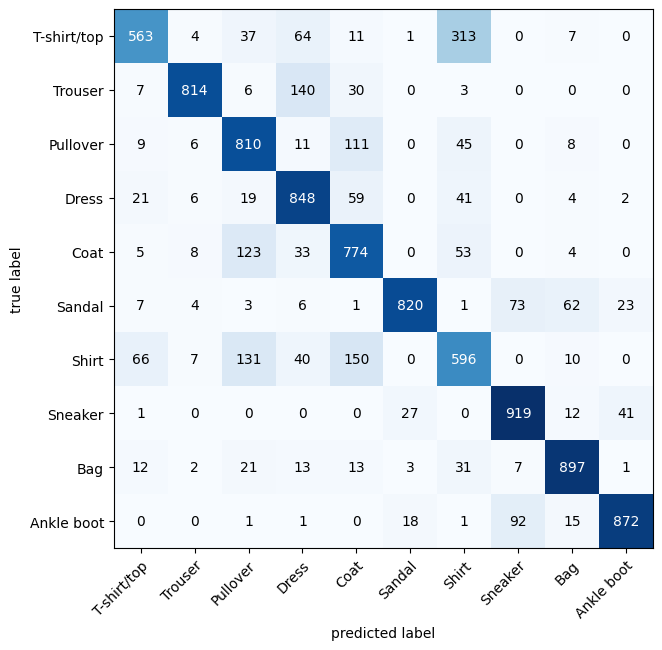

In [74]:

from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. setup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names),
                          task="multiclass")
confmat_tensor = confmat(preds = y_pred_tensor,
                         target=test_data.targets)
# 3. plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(), # matplotlib likes working with numpy
    class_names=class_names,
    figsize=(10,7)
)

## 11. Save and reload your trained model

In [76]:
from pathlib import Path

# create model directory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# create mdoel save
MODEL_NAME = "03_pytorch_computer_vision_mode_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# save the mdoel state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_mode_2.pth


In [77]:
from pickle import load
# create a new instance
torch.manual_seed(42)
loaded_model_2 = FashionMNISTModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names))

# load in the save state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# send the model to the target device
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [78]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.33841609954833984,
 'model_acc': 87.90934504792332}

In [79]:
# evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.33841609954833984,
 'model_acc': 87.90934504792332}

In [81]:
# check if model results are close to each other
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-02
)

tensor(True)